# Title

In [2]:
import numpy as np
from scipy.optimize import minimize

In [8]:
lista_x = []
def get_x(Xi):
    lista_x.append(Xi)

In [9]:
def objective(theta):
    th1, th2, th3 = theta
    return (np.cos(3*th1) - np.cos(3*th2) + np.cos(3*th3))**2 + (np.cos(5*th1) - np.cos(5*th2) + np.cos(5*th3))**2

ma = .8

def constraint1a(theta):
    th1, th2, th3 = theta
    return ma - np.cos(th1) + np.cos(th2) - np.cos(th3)

def constraint1b(theta):
    th1, th2, th3 = theta
    return th1 

def constraint2b(theta):
    th1, th2, th3 = theta
    return th2 - th1

def constraint3b(theta):
    th1, th2, th3 = theta
    return th3 - th2

def constraint4b(theta):
    th1, th2, th3 = theta
    return np.pi/2 - th3

In [10]:
# x0 = [np.radians(10), np.radians(30), np.radians(85)]
x0 = [np.radians(13.36), np.radians(26.73), np.radians(53)]
b = (0., np.pi/2)
bnds = (b,b,b)
con1a = {'type': 'eq', 'fun': constraint1a}
con1b = {'type': 'ineq', 'fun': constraint1b}
con2b = {'type': 'ineq', 'fun': constraint2b}
con3b = {'type': 'ineq', 'fun': constraint3b}
con4b = {'type': 'ineq', 'fun': constraint4b} 

cons = [con1a, con1b, con2b, con3b, con4b]

In [11]:
lista_x = []
sol = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons, callback=get_x); sol

     fun: 3.824249155566094e-10
     jac: array([ 0.00297242,  0.00241789, -0.00366214])
 message: 'Optimization terminated successfully.'
    nfev: 116
     nit: 22
    njev: 22
  status: 0
 success: True
       x: array([0.44188845, 0.76978336, 0.90953123])

In [12]:
np.degrees(sol.x)

array([25.31834331, 44.10533785, 52.11230055])

In [13]:
last_index = sol.nit - 1
tf1, tf2, tf3 = np.degrees(sol.x)

Text(0, 0.5, 'Ângulo (°)')

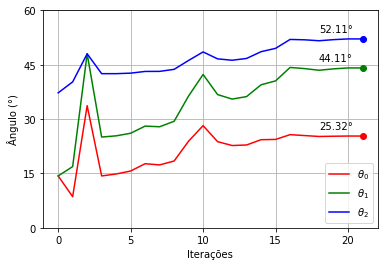

In [14]:
array = np.array(lista_x); array[:, 0]

import matplotlib.pyplot as plt

plt.plot(np.degrees(array[:, 0]), 'r-', label=r'$\theta_0$')
plt.plot(np.degrees(array[:, 1]), 'g-', label=r'$\theta_1$')
plt.plot(np.degrees(array[:, 2]), 'b-', label=r'$\theta_2$')
plt.plot(last_index, tf1, 'ro')
plt.plot(last_index, tf2, 'go')
plt.plot(last_index, tf3, 'bo')
plt.text(last_index - 3, tf1+2, '%.2f°'% tf1)
plt.text(last_index - 3, tf2+2, '%.2f°'% tf2)
plt.text(last_index - 3, tf3+2, '%.2f°'% tf3)
plt.grid()
plt.yticks([0, 15, 45, 30, 60])
plt.legend(loc='lower right')
plt.xlabel('Iterações')
plt.ylabel('Ângulo (°)')

In [16]:
# plt.text?

In [51]:
angles = []
m = np.linspace(0.1, 1.2, 12)

for ma in m:
    def objective(theta):
        th1, th2, th3 = theta
        return (np.cos(3*th1) - np.cos(3*th2) + np.cos(3*th3))**2 + (np.cos(5*th1) - np.cos(5*th2) + np.cos(5*th3))**2

    def constraint1a(theta):
        th1, th2, th3 = theta
        return ma - np.cos(th1) + np.cos(th2) - np.cos(th3)

    def constraint1b(theta):
        th1, th2, th3 = theta
        return th1 

    def constraint2b(theta):
        th1, th2, th3 = theta
        return th2 - th1

    def constraint3b(theta):
        th1, th2, th3 = theta
        return th3 - th2

    def constraint4b(theta):
        th1, th2, th3 = theta
        return np.pi/2 - th3
    
#     x0 = [np.radians(10), np.radians(30), np.radians(85)]
    x0 = [np.radians(13.36), np.radians(26.73), np.radians(53)]
    b = (0., np.pi/2)
    bnds = (b,b,b)
    con1a = {'type': 'eq', 'fun': constraint1a}
    con1b = {'type': 'ineq', 'fun': constraint1b}
    con2b = {'type': 'ineq', 'fun': constraint2b}
    con3b = {'type': 'ineq', 'fun': constraint3b}
    con4b = {'type': 'ineq', 'fun': constraint4b} 

    cons = [con1a, con1b, con2b, con3b, con4b]
    
    sol = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)
    print('ma:', ma, np.degrees(sol.x))
    
    angles.append(np.degrees(sol.x))
    
#     last_index = sol.nit - 1
#     tf1, tf2, tf3 = np.degrees(sol.x)
    
#     array = np.array(lista_x); array[:, 0]

#     import matplotlib.pyplot as plt

#     plt.plot(np.degrees(array[:, 0]), 'r-', label=r'$\theta_0$')
#     plt.plot(np.degrees(array[:, 1]), 'g-', label=r'$\theta_1$')
#     plt.plot(np.degrees(array[:, 2]), 'b-', label=r'$\theta_2$')
#     plt.plot(last_index, tf1, 'ro')
#     plt.plot(last_index, tf2, 'go')
#     plt.plot(last_index, tf3, 'bo')
#     plt.text(last_index - 3, tf1+2, '%.2f°'% tf1)
#     plt.text(last_index - 3, tf2+2, '%.2f°'% tf2)
#     plt.text(last_index - 3, tf3+2, '%.2f°'% tf3)
#     plt.grid()
#     plt.yticks([0, 15, 45, 30, 60, 90])
#     plt.legend(loc='lower right')
#     plt.xlabel('Iterações')
#     plt.ylabel('Ângulo (°)')
#     plt.show()

ma: 0.1 [ 8.21445079  8.21445079 84.26082952]
ma: 0.2 [ 8.74005566  8.74005566 78.46304097]
ma: 0.3 [ 9.10749058  9.10749058 72.54239688]
ma: 0.4 [ 6.2633828   6.2633828  66.42182185]
ma: 0.5 [ 7.4922689   7.4922689  60.00000239]
ma: 0.6 [32.09305282 54.5737389  70.58136689]
ma: 0.7 [29.60115674 53.63794271 64.95049956]
ma: 0.7999999999999999 [25.31834328 44.10533772 52.11230045]
ma: 0.8999999999999999 [8.34973723e-04 1.61901214e+01 3.06450237e+01]
ma: 0.9999999999999999 [0.00473567 2.69756372 2.69756372]
ma: 1.0999999999999999 [3.04706251e-08 1.26562776e+01 1.26562776e+01]
ma: 1.2 [ 0.         90.         86.28023455]


In [52]:
angles = np.array(angles)

In [53]:
a0, a1, a2 = angles[:, [0]], angles[:, [1]], angles[:, [2]]

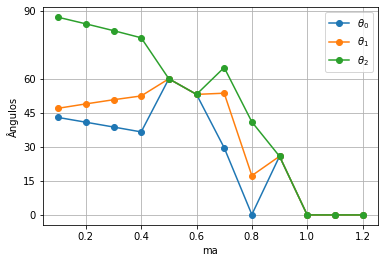

In [50]:
# bool_op = a0 > 90
# a0[bool_op] = a0[bool_op] - 90

# bool_op = a1 > 90
# a1[bool_op] = a1[bool_op] - 90

# bool_op = a2 > 90
# a2[bool_op] = a2[bool_op] - 90

plt.plot(m, a0, 'o-', label=r'$\theta_0$')
plt.plot(m, a1, 'o-', label=r'$\theta_1$')
plt.plot(m, a2, 'o-', label=r'$\theta_2$')
# plt.text(m[0]+.025, a0[0]+2, '%.2f°'% a0[0])

plt.yticks([0, 15, 45, 30, 60, 90])
plt.grid()
plt.xlabel('ma')
plt.ylabel('Ângulos')
plt.legend()
plt.show()

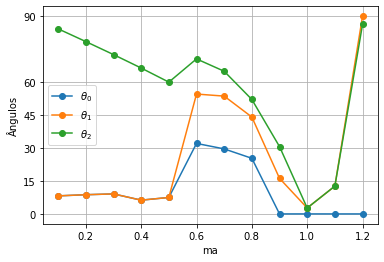

In [54]:
plt.plot(m, a0, 'o-', label=r'$\theta_0$')
plt.plot(m, a1, 'o-', label=r'$\theta_1$')
plt.plot(m, a2, 'o-', label=r'$\theta_2$')
plt.yticks([0, 15, 45, 30, 60, 90])
plt.grid()
plt.xlabel('ma')
plt.ylabel('Ângulos')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import minimize

In [ ]:
def objective(x):
    x1, x2, x3, x4 = x
    return x1*x4*(x1+x2+x3)+x3

def constraint1(x):
    x1, x2, x3, x4 = x
    return x1*x2*x3*x4-25.

def constraint2(x):
    x1, x2, x3, x4 = x
    
    return x1**2 + x2**2 + x3**2 + x4**2 - 40

In [ ]:
x0 = [1,5,5,1]

b = (1.0,5.0)
bnds = (b,b,b,b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
cons = [con1, con2]

In [ ]:
sol = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons); sol

In [ ]:
import nlopt
from numpy import *

In [ ]:
def toVector(w, z):
    assert w.shape == (2, 4)
    assert z.shape == (2, 4)
    return np.hstack([w.flatten(), z.flatten()])

def toWZ(vec):
    assert vec.shape == (2*2*4,)
    return vec[:2*4].reshape(2,4), vec[2*4:].reshape(2,4)

def doOptimization(f_of_w_z, w0, z0):
    def f(x): 
        w, z = toWZ(x)
        return f_of_w_z(w, z)

    result = minimize(f, toVec(w0, z0))
    # Different optimize functions return their
    # vector result differently. In this case it's result.x:
    result.x = toWZ(result.x) 
    return result

In [ ]:
import numpy as np
from scipy.optimize import minimize

In [ ]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [ ]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})

In [ ]:
res

In [ ]:
import numpy as np

In [ ]:
N = 3

m = 0.01

a = np.array([10, 30, 60, 85])
a = np.radians(a)

ab = np.pi/2

while m < 1.27:
    a[0] = np.pi/180
    while a[0] < ab:
        a[-1] = a[-2] + np.pi/180 
        while a[-1] < ab:
            b1
    
    np.sqrt(a1**2 + b1**2) = m * Udc/2
    
    for i in range(a.size - 1):
        a[i + 1] = a[i] + np.pi/180
    something = False
        
a

In [1]:
a = 6j+1

In [4]:
a +8

(9+6j)

In [11]:
import numpy as np

In [12]:
alfa = [10, 30, 40, 50]

In [25]:
v_initial_pos, v_initial_neg = (6j + 1), (6j - 1)
v_pos = np.arange(v_initial_pos, v_initial_pos*11, 1)

In [28]:
for v in v_pos:
    soma = 0
    for i in range(len(alfa)):
        parcial = (-1)**i * np.cos(v * alfa[i])
        soma += parcial
        print('\tv = ', v, ' | alfa = ', alfa[i], ' | parcial = ', parcial)
    print('v = ', v, ' | soma = ', soma, '\n')

	v =  (1+6j)  | alfa =  10  | parcial =  (-4.791129433946273e+25+3.106380644256991e+25j)
	v =  (1+6j)  | alfa =  30  | parcial =  (-1.1486983620512958e+77-7.357793453983644e+77j)
	v =  (1+6j)  | alfa =  40  | parcial =  (-5.671933940609084e+103-6.336769285662479e+103j)
	v =  (1+6j)  | alfa =  50  | parcial =  (-9.371877421271035e+129-2.5482192064103713e+129j)
v =  (1+6j)  | soma =  (-9.371877421271035e+129-2.5482192064103713e+129j) 

	v =  (2+6j)  | alfa =  10  | parcial =  (2.3301636512105726e+25-5.212951114140418e+25j)
	v =  (2+6j)  | alfa =  30  | parcial =  (7.092544228249382e+77-2.269900616500704e+77j)
	v =  (2+6j)  | alfa =  40  | parcial =  (-9.387815614989373e+102+8.452465249034643e+103j)
	v =  (2+6j)  | alfa =  50  | parcial =  (-8.374954693231354e+129-4.9178899346742816e+129j)
v =  (2+6j)  | soma =  (-8.374954693231354e+129-4.9178899346742816e+129j) 

	v =  (3+6j)  | alfa =  10  | parcial =  (8.807814783070235e+24+5.641697080428203e+25j)
	v =  (3+6j)  | alfa =  30  | parcial 

In [24]:
v_neg

array([], dtype=complex128)

In [20]:
v_initial_neg*11

(-11+66j)